# Vivek Bavda:
## DSIR 7/12
### Project 2 August 9, 2021 
### Predicting Sales of Homes in Ames, Iowa

### Introduction:
*As you  are aware, you've asked me to predict*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university. However, despite growth in locally determined outcomes, the SAT and ACT snapshots often are seen as the main evaluation point by your constituents. To the extent our students score well, it allows us greater political capital to institue educational reforms. It is imperative that we choose and mandate by state and local regulations which test demonstrates higher scores and bests represents our students' achievements.

This requires us to analyze the format and results of the SAT and ACT. The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections.)) The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). 
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

It is important to also keep in 

### Ames Houding datasets from 2006 - 2010 were used in this analysis.

* [AmesDatasetTrain']('./datasets/train.csv'):  What it is
   https://wwwgov/ds/sp/ai/

* ['AmesDatasetTest'](./datasets/test.csv'='./datasets/train.csv'(../data/sat_2019_ca.csv): 2019 SAT Scores in California by School, District and County. The data was collected from https://wwwgov/ds/sp/ai/
    The total number of testakers is listed. The dataset also breaks the scores down by grade level. Benchmarks are listed for the two measurement categories. First, the number of students who met or exceeded the benchmark for reading & writing is listed. Second, the number of students who met or exceeded the benchmark for math. There is also a category for meeting both benchmarks.
    
* ['AmesDatasetKagl']('./datasets/sample_sub_reg.csv'):
https://wwwgov/ds/sp/ai/

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

## Data cleaning:

In [104]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
import patsy
#For EDA and Data cleaning
def datacleaning(feature):
    print(dftrain[feature].describe())
    print(dftrain[feature].isnull().sum())
    print(dftrain[feature].unique())
    print(dftrain[feature].value_counts())
    print(dftest[feature].describe())
    print(dftest[feature].isnull().sum())
    print(dftest[feature].unique())
    print(dftest[feature].value_counts())
    print(dftrain[feature].hist())
    sns.pairplot(dftrain, x_vars=[feature], y_vars=['SalePrice'])
    print(dftrain[[feature, 'SalePrice']].corr())
    return

In [77]:
AmesDatasetTrain='./datasets/train.csv'

AmesDatasetTest='./datasets/test.csv'

AmesDatasetKagle='./datasets/sample_sub_reg.csv'

dftrain=pd.read_csv(AmesDatasetTrain)

dftest=pd.read_csv(AmesDatasetTest)

dfkagle=pd.read_csv(AmesDatasetKagle)

In [98]:
dftrain

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,square_feet
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,1479
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,2122
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,1057
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,1444
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,1445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2008,WD,298751,1728
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2009,WD,82500,861
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,3,2009,WD,177000,1913
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2009,WD,144000,1200


In [7]:
dftrain.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
# Check for nulls
dftrain.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [30]:
#ccheck Data types
dftrain.dtypes.sort_values().head(28)

Id                   int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
1st Flr SF           int64
Fireplaces           int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
Wood Deck SF         int64
Year Remod/Add       int64
SalePrice            int64
Lot Area             int64
PID                  int64
MS SubClass          int64
Overall Qual         int64
Year Built           int64
Overall Cond         int64
Total Bsmt SF      float64
BsmtFin SF 2       float64
Garage Cars        float64
BsmtFin SF 1       float64
Bsmt Full Bath     float64
Bsmt Unf SF        float64
Lot Frontage       float64
Garage Yr Blt      float64
Mas Vnr Area       float64
B

In [ ]:
#81 total values--Exterior 1 is repeated because this was 22 and above is 60
dftrain.dtypes.sort_values().tail(22)

count    2051.000000
mean     1474.033642
std       843.980841
min         1.000000
25%       753.500000
50%      1486.000000
75%      2198.000000
max      2930.000000
Name: Id, dtype: float64
0
[109 544 153 ... 916 639  10]
2049    1
749     1
2556    1
507     1
505     1
       ..
1068    1
1066    1
1062    1
1060    1
2047    1
Name: Id, Length: 2051, dtype: int64
count     878.000000
mean     1444.749431
std       850.838263
min         2.000000
25%       692.250000
50%      1433.000000
75%      2197.500000
max      2928.000000
Name: Id, dtype: float64
0
[2658 2718 2414 1989  625  333 1327  858   95 1568 2482 1364 2584  818
 2673 2089 1297  790 2616  720  222  557 1148 2766  534 1452  630 2648
  125 1904 1670  756  717 1032  852 1731 2639 2071 1267 1851  567 2439
 1898  647 2256  979 1444 2485  157   88 2003  186 1425 2695  738  395
 1353 1878  390 1456 1103 1387 2070 1199 2479  501 2362 1718 2188 1483
 2557  437 2224 1628  397  587  971 2611 1887 2399 2148  304 1997 2817
 1431  

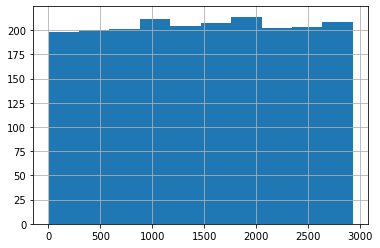

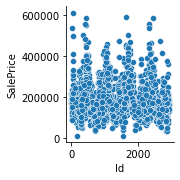

In [105]:
#Going through each numeric variable
#Id is parcel id number for people to take look at. No relevance to this project
datacleaning('Id')             


count    2051.000000
mean      329.329108
std       425.671046
min         0.000000
25%         0.000000
50%         0.000000
75%       692.500000
max      1862.000000
Name: 2nd Flr SF, dtype: float64
0
[ 754 1209    0  700  614 1040  504  728  645  720  783 1044  673  957
  252  725  550  745  890  620  651  862  756  653 1392  546  689  600
 1106 1426  780  531  732  739 1169  665  616  540  786 1368 1157  709
  690  445  836  564 1345  707  650  712  676  601  240 1862  881  408
 1427  857 1074  876 1045  813  927  576  539  586  624 1182  702 1093
  884  743  941 1312 1384 1296  492  462  981 1277 1254  272  750  608
  656 1370  595  797  960  549  703 1250  453  561  685  636  872  886
  840  829  670  795  505  698  537  864  804  704  412  924  896  376
  438 1371 1089  755  589 1158  980 1038  517  925  602  887  741  348
  390 1036  672  475  464 1194  530  701  929  584  465  319  563  695
  668  582  545 1005  757  585  684  787  888  336  551  903 1198  524
  482  869  738 

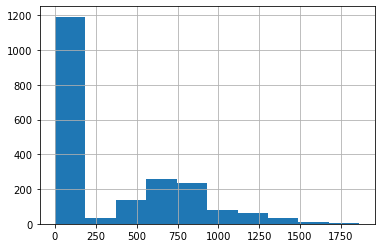

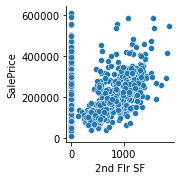

In [106]:
#no nulls--there are 0s-probably ranches. This was combined with 1st floor sq feet /
#for 'square_feet'
datacleaning('2nd Flr SF')

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st Flr SF, dtype: float64
0
[ 725  913 1057  744  831 1888 1072 1188  924 1040  483 1208 1288  962
 1361 1430  624 1121 1285  764  894 1659 1209 1187 1056 1453 1265 1034
  672 2524  792 1494  948 1718 1142  925 1844 1242  990 1256 2076 1110
 1050  983  984  851 1063  768 1328 1392  546 1575  663  600  936  916
 1164 1184 1483  960 1382 1120  567  976 1802 1506 1508 2032 1194  970
 1616  872  520 1105  616 2234  876  864 1189 1666 1200  928 1336 1427
 1212  754 1535 1152 1151 1138 1074 1561 1358 1884  605 1671  797  804
 1193  673 1664 1390  868 1422 1128 1116  660 1707 1466 1638 1721  996
 1202  988 1028  720 1599  707  959  813 1092 1055  676  855 1719  780
 1554 1528 1008 1172 1418  495  985  888 1992 1478  950  912 1326 1204
  798 1236 1416  946 1088  816  536  572 1126  992  752 1218 1601 1313
  807 1325  733 

            1st Flr SF  SalePrice
1st Flr SF    1.000000   0.618486
SalePrice     0.618486   1.000000


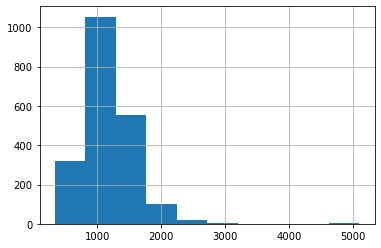

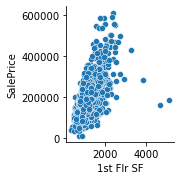

In [107]:
# no null no  absurdities no 0's. It makes sense to combine square feet  with 2nd flooor
datacleaning('1st Flr SF')

count    2051.000000
mean     1493.817162
std       497.618666
min       334.000000
25%      1124.500000
50%      1440.000000
75%      1728.000000
max      5642.000000
Name: square_feet, dtype: float64
0
[1479 2122 1057 ... 2668 1913 1804]
864     25
1040    20
1092    19
1456    15
1200    14
        ..
1892     1
2057     1
1898     1
1908     1
2037     1
Name: square_feet, Length: 1051, dtype: int64
count     878.000000
mean     1494.185649
std       505.042804
min       407.000000
25%      1108.250000
50%      1436.000000
75%      1776.000000
max      4476.000000
Name: square_feet, dtype: float64
0
[1928 1967 1496  968 1394 1092 1093 1268 1680 1279 1217 1040 1375 2787
 1827 1340 1436 1073 1773 1742 1060  864 1617  988 1218 1738 1750 1054
  670  858  848 2640 1178 1492 1458 1657  998  910 1358 1224 1886 1327
 1363 1501 1344 1786  965  936 1248 2268 1615 1360 1142 1026 1820 1193
 1865 2006 1140 1176 1670 1603 2063 1302  774  747 2520 1560 1472 1050
 1724 1771 1207  882 1780 1459 110

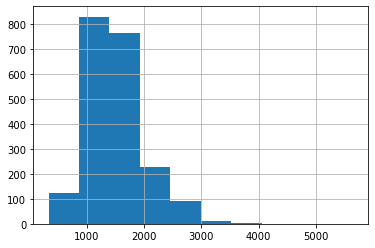

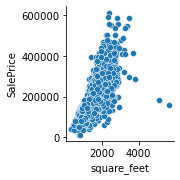

In [108]:
#dftrain['square_feet'] = dftrain['1st Flr SF'] + dftrain['2nd Flr SF']
#dftest['square_feet']=dftest['1st Flr SF'] + dftest['2nd Flr SF']
datacleaning('square_feet')

count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64
0
[   0  205   80  528  513  371  473  108 1064  515  120  312  572  234
  390  697  114  512  144  514  397  140  479  259  436  156  384  360
   53  362  450]
0       2018
80         3
205        2
512        1
515        1
513        1
479        1
473        1
397        1
371        1
259        1
53         1
1064       1
572        1
528        1
514        1
450        1
436        1
390        1
384        1
362        1
360        1
312        1
234        1
156        1
144        1
140        1
120        1
114        1
108        1
697        1
Name: Low Qual Fin SF, dtype: int64
count    878.000000
mean       2.728929
std       32.572548
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      481.000000
Name: Low Qual Fin SF, dtype: floa

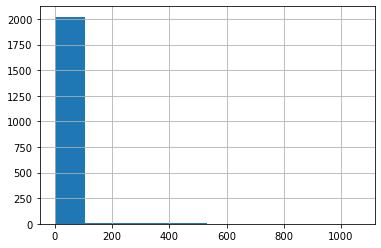

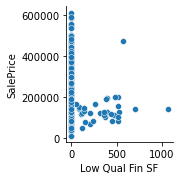

In [109]:
datacleaning('Low Qual Fin SF')  #Useless variable-not enough data points to be useful-
#Can drop id, 1stflsq, 2ndflsq and low qual.

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: Gr Liv Area, dtype: float64
0
[1479 2122 1057 ... 2668 1913 1804]
864     25
1040    20
1092    19
1200    16
1456    15
        ..
1894     1
1898     1
2057     1
1908     1
2037     1
Name: Gr Liv Area, Length: 1053, dtype: int64
count     878.000000
mean     1496.914579
std       506.468967
min       407.000000
25%      1114.000000
50%      1436.000000
75%      1779.000000
max      4476.000000
Name: Gr Liv Area, dtype: float64
0
[1928 1967 1496  968 1394 1092 1093 1268 1680 1279 1217 1040 1375 2787
 1827 1340 1436 1073 1773 1742 1060  864 1617  988 1218 1738 1750 1054
  670  858 1208 2640 1178 1492 1458 1657  998  910 1358 1224 1886 1327
 1363 1501 1344 1786  965  936 1248 2268 1615 1360 1142 1026 1820 1193
 1865 2006 1140 1176 1670 1603 2063 1302  774  848  747 2520 1560 1472
 1050 1724 1771 1207  882 1780 145

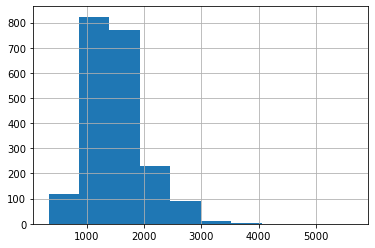

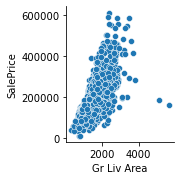

In [110]:
datacleaning('Gr Liv Area')  #Looks no different than square feet-dropping this as dup-
#Sq feet's correlation is higher than this one by a small margin
#Can drop id, 1stflsq, 2ndflsq, gr liv area and low qual.

count    2051.000000
mean        1.577279
std         0.549279
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Full Bath, dtype: float64
0
[2 1 3 0 4]
2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64
count    878.000000
mean       1.539863
std        0.559060
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Full Bath, dtype: float64
0
[2 1 4 3 0]
2    436
1    418
3     18
0      4
4      2
Name: Full Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Full Bath  SalePrice
Full Bath   1.000000   0.537969
SalePrice   0.537969   1.000000


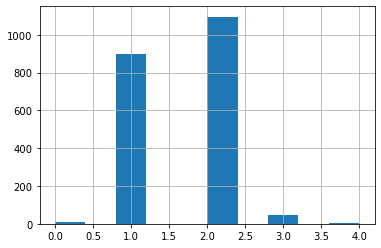

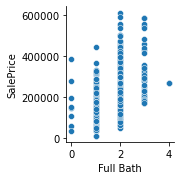

In [111]:
datacleaning('Full Bath')# May need to do an interaction with square feet and bedrooms\
# may need to make a dummy with 0< 1 bath or greater than 1 bath
#--Can drop id, 1stflsq, 2ndflsq, gr liv area and low qual.

count    2051.000000
mean        0.371039
std         0.501043
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Half Bath, dtype: float64
0
[1 0 2]
0    1308
1     725
2      18
Name: Half Bath, dtype: int64
count    878.000000
mean       0.398633
std        0.505927
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Half Bath, dtype: float64
0
[0 1 2]
0    535
1    336
2      7
Name: Half Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Half Bath  SalePrice
Half Bath   1.000000   0.283001
SalePrice   0.283001   1.000000


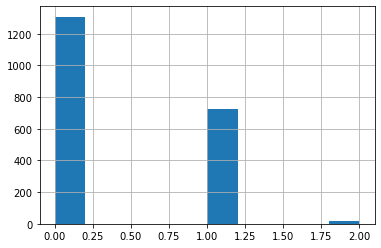

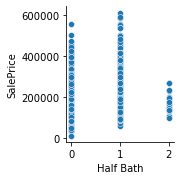

In [112]:
datacleaning('Half Bath')  #May have to add the baths or use interaction

count    2051.000000
mean        2.843491
std         0.826618
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Bedroom AbvGr, dtype: float64
0
[3 4 2 5 1 0 6 8]
3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64
count    878.000000
mean       2.879271
std        0.830712
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: Bedroom AbvGr, dtype: float64
0
[4 6 3 2 1 5 0]
3    488
2    199
4    135
1     37
6      9
5      7
0      3
Name: Bedroom AbvGr, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               Bedroom AbvGr  SalePrice
Bedroom AbvGr       1.000000   0.137067
SalePrice           0.137067   1.000000


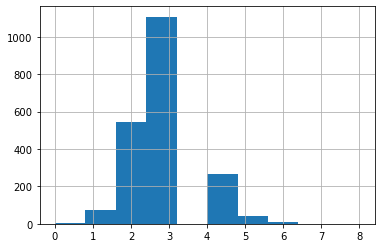

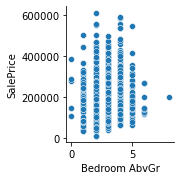

In [113]:
datacleaning('Bedroom AbvGr')   #correlation is surprisingly low-probably wouldn't include
#--Can drop id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, half bathand low qual.
#include sq feet and Full Bath

count    2051.000000
mean        1.042906
std         0.209790
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kitchen AbvGr, dtype: float64
0
[1 2 0 3]
1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64
count    878.000000
mean       1.047836
std        0.223966
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Kitchen AbvGr, dtype: float64
0
[2 1 0 3]
1    835
2     41
0      1
3      1
Name: Kitchen AbvGr, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               Kitchen AbvGr  SalePrice
Kitchen AbvGr       1.000000  -0.125444
SalePrice          -0.125444   1.000000


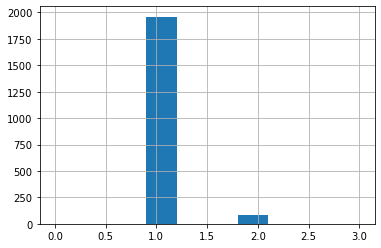

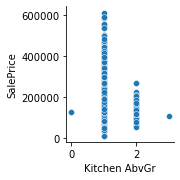

In [114]:
datacleaning('Kitchen AbvGr')# based on low correlation and scatterplot-leave out variable-drop
#--Can drop id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet and Full Bath

count    2051.000000
mean        6.435885
std         1.560225
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRms AbvGrd, dtype: float64
0
[ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
2       1
14      1
13      1
15      1
Name: TotRms AbvGrd, dtype: int64
count    878.000000
mean       6.454442
std        1.596632
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       12.000000
Name: TotRms AbvGrd, dtype: float64
0
[ 9 10  7  5  6  3  8  4 11 12]
6     247
5     179
7     174
8     119
4      57
9      45
10     31
3      14
11      9
12      3
Name: TotRms AbvGrd, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               TotRms AbvGrd  SalePrice
TotRms AbvGrd       1.000000   0.504014
SalePrice           0.504014   1.000000


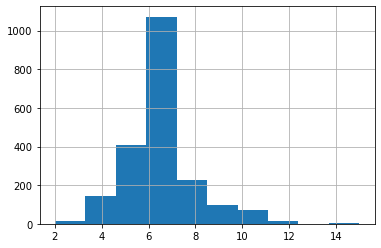

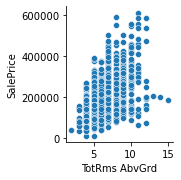

In [115]:
datacleaning('TotRms AbvGrd')

#Can drop id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet and Full Bath
#maybe include--sq feet should cover this

count    2051.000000
mean        0.590931
std         0.638516
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
0
[0 1 2 4 3]
0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64
count    878.000000
mean       0.618451
std        0.669571
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Fireplaces, dtype: float64
0
[0 1 2 3]
0    422
1    375
2     75
3      6
Name: Fireplaces, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Fireplaces  SalePrice
Fireplaces    1.000000   0.471093
SalePrice     0.471093   1.000000


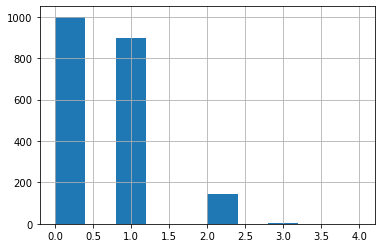

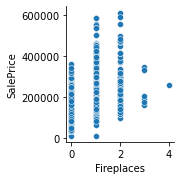

In [116]:
datacleaning('Fireplaces')

In [78]:


dftrain.dtypes.sort_values().head(28)

Id                 int64
2nd Flr SF         int64
Low Qual Fin SF    int64
Gr Liv Area        int64
Full Bath          int64
Half Bath          int64
Bedroom AbvGr      int64
Kitchen AbvGr      int64
TotRms AbvGrd      int64
1st Flr SF         int64
Fireplaces         int64
Open Porch SF      int64
Enclosed Porch     int64
3Ssn Porch         int64
Screen Porch       int64
Pool Area          int64
Misc Val           int64
Mo Sold            int64
Yr Sold            int64
Wood Deck SF       int64
Year Remod/Add     int64
SalePrice          int64
Lot Area           int64
PID                int64
MS SubClass        int64
Overall Qual       int64
Year Built         int64
Overall Cond       int64
dtype: object

In [80]:
dftest.dtypes.sort_values().head(28)

Id                 int64
Bsmt Unf SF        int64
Yr Sold            int64
1st Flr SF         int64
2nd Flr SF         int64
Low Qual Fin SF    int64
Gr Liv Area        int64
Bsmt Full Bath     int64
Bsmt Half Bath     int64
Full Bath          int64
Half Bath          int64
Bedroom AbvGr      int64
BsmtFin SF 2       int64
Kitchen AbvGr      int64
Fireplaces         int64
Garage Cars        int64
Garage Area        int64
Wood Deck SF       int64
Open Porch SF      int64
Enclosed Porch     int64
3Ssn Porch         int64
Screen Porch       int64
Pool Area          int64
Misc Val           int64
Mo Sold            int64
TotRms AbvGrd      int64
BsmtFin SF 1       int64
Total Bsmt SF      int64
dtype: object

In [11]:
dftrain.shape


(2051, 81)

In [ ]:
dftrain.corr()['SalePrice'][(dftrain.corr()['SalePrice'].sort_values().abs() > .4)]

In [ ]:
sns.heatmap(dftrain.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [20]:
#Initial Run
#features=['square_feet','Full Bath']
#X=dftrain[features]
X = dftrain._get_numeric_data().drop(columns='SalePrice')
features = list(X.columns)
target=dftrain[['SalePrice']]
#define features, target
#X = dftrain[[features]].values
y = target 



In [21]:
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1538, 38) (1538, 1)
(513, 38) (513, 1)


In [25]:
#instantiate lr estimator
lr = LinearRegression(n_jobs = -1)



#fit estimator
model = lr.fit(X_train, y_train)
model
#predict and score
a
 



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#Scoring
lr.score(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
cross_val_score(lr, X_train, y_train).mean()

In [ ]:
# Checking for homoscedasticy of the error and normal distribution of eror
pred=lm.predict(X_test)

In [ ]:
residuals = y_test - pred

In [ ]:
plt.hist(residuals);

In [ ]:
plt.scatter(pred, residuals)

In [ ]:
#Checking to see if the natural log makes a difference

In [ ]:
y_test.map(np.log).hist()

In [ ]:
#Transforming with the natural log as above shows distribution is normal

In [ ]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)
